# Direct Linear Transform

In [1]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('Images\calib-object.jpg')
cv2.imshow('image',image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
M = [[0,0,28],[0,0,56],[0,28,28],[0,28,56],[0,56,28],[0,56,56],[28,0,0],[56,0,0],[28,28,0],[56,28,0],[28,56,0],[56,56,0],[0,28,0],[0,56,0],[0,84,0],[84,0,0],[0,0,84],[84,84,0],[112,28,0],[0,28,112]]
P= [[1661,1609],[1793,1626],[1663,1782],[1663,1952],[1789,1981],[1785,2152],[1412,1780],[1278,1802],[1412,1780],[1280,1977],[1415,2117],[1284,2148],[1545,1761],[1545,1928],[1545,2088],[1134,1640],[1931,1643],[1143,2182],[977,1849],[2068,2046]]

In [4]:
import numpy as np
M = np.asarray(M)
M= M*(1*10**(-3))
P = np.asarray(P)


A = []
n = M.shape[0]
for i in range(n):
    x, y, z = M[i, 0], M[i, 1], M[i, 2]
    u, v = P[i, 0], P[i, 1]
    A.append( [x, y, z, 1, 0, 0, 0, 0, -u * x, -u * y, -u * z, -u] )
    A.append( [0, 0, 0, 0, x, y, z, 1, -v * x, -v * y, -v * z, -v] )

# Convert A to array
A = np.asarray(A) 

# Find the 11 parameters:
U, S, V = np.linalg.svd(A)

# The parameters are in the last line of Vh and normalize them
L = V[-1, :] / V[-1, -1]
print(L)
# Camera projection matrix
H = L.reshape(3, 3 + 1)
print(H)





[-1.45471308e+07 -7.25706198e+06 -2.94190710e+07  1.58235045e+03
 -1.65535726e+07 -8.19063742e+06 -3.28852590e+07  1.86397535e+03
 -8.59996512e+03 -4.83844958e+03 -1.70545203e+04  1.00000000e+00]
[[-1.45471308e+07 -7.25706198e+06 -2.94190710e+07  1.58235045e+03]
 [-1.65535726e+07 -8.19063742e+06 -3.28852590e+07  1.86397535e+03]
 [-8.59996512e+03 -4.83844958e+03 -1.70545203e+04  1.00000000e+00]]


In [5]:
proj = []
for i in range(n):
    proj.append(np.dot(M,H))
    
print(proj)


[array([[-2.40799023e-01, -1.35476588e-01, -4.77526568e-01,
         2.80000000e-05],
       [-4.81598047e-01, -2.70953176e-01, -9.55053137e-01,
         5.60000000e-05],
       [-4.63740833e+02, -2.29473324e+02, -9.21264779e+02,
         5.22193097e-02],
       [-4.63981632e+02, -2.29608801e+02, -9.21742305e+02,
         5.22473097e-02],
       [-9.27240866e+02, -4.58811172e+02, -1.84205203e+03,
         1.04410619e-01],
       [-9.27481665e+02, -4.58946649e+02, -1.84252956e+03,
         1.04438619e-01],
       [-4.07319663e+02, -2.03197735e+02, -8.23733989e+02,
         4.43058127e-02],
       [-8.14639327e+02, -4.06395471e+02, -1.64746798e+03,
         8.86116254e-02],
       [-8.70819697e+02, -4.32535583e+02, -1.74452124e+03,
         9.64971224e-02],
       [-1.27813936e+03, -6.35733319e+02, -2.56825523e+03,
         1.40802935e-01],
       [-1.33431973e+03, -6.61873431e+02, -2.66530849e+03,
         1.48688432e-01],
       [-1.74163939e+03, -8.65071167e+02, -3.48904248e+03,
     

In [6]:
#Rotation Matrix
proj = np.asarray(H)
cameraMatrix, rotMatrix, transVect, rotMatrixX, rotMatrixY, rotMatrixZ, eulerAngles = cv2.decomposeProjectionMatrix(proj)
print("Rotation Matrix:")
print(rotMatrix)
print("Camera Matrix")
print(cameraMatrix)

Rotation Matrix:
[[ 0.89527041 -0.02298931 -0.44492965]
 [-0.0893598   0.96910791 -0.22987973]
 [ 0.43646961  0.24556335  0.86555931]]
Camera Matrix
[[ 2.32635929e+05  1.02990077e+06 -3.35953998e+07]
 [ 0.00000000e+00  1.10126702e+06 -3.77005939e+07]
 [ 0.00000000e+00  0.00000000e+00 -1.97034681e+04]]


In [7]:
#camera centre
Q=H[0:3,0:3]
Qinv=np.linalg.inv(Q)
cam_centre=np.matmul(-Qinv,H[:,3])
print(cam_centre)

[ 3.12461158e-04  4.83976199e-05 -1.12657786e-04]


# RANSAC

In [8]:
import random
b=[]
for i in range(0,2*M.shape[0]):
    b.append(random.randint(0,2200))
A=[]
for i in range(0,2*P.shape[0]):
    c=[]
    for i in range(12):
        c.append(random.randint(0,113))
    
    A.append(c)

b = np.asarray(b)
A= np.asarray(A)

x=0
for i in range(0,M.shape[0]):
    A[x,0:3]=M[i,:]
    A[x,3]=1
    A[x,8:11]=-P[i,0]*M[i,:]
    A[x,11]=-P[i,0]
    A[x+1,4:7]=M[i,:]
    A[x+1,7]=1
    A[x+1,8:11]=-P[i,1]*M[i,:]
    A[x+1,11]=-P[i,1]
    x=x+2
U,S,VT=np.linalg.svd(A)
V=VT.T
Mtemp=V[:,V.shape[1]-1]
Mat=np.zeros((3,4))
Mat[0,:]=Mtemp[:4]
Mat[1,:]=Mtemp[4:8]
Mat[2,:]=Mtemp[8:12]

print(Mat)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]


In [263]:
#Rotation Matrix
rot_mat = np.asarray(Mat)
cameraMatrix, rotMatrix, transVect, rotMatrixX, rotMatrixY, rotMatrixZ, eulerAngles = cv2.decomposeProjectionMatrix(rot_mat)
print(rotMatrix)

[[-0.6790326  -0.31549154 -0.66285731]
 [ 0.53681333  0.40251617 -0.74149321]
 [ 0.50074563 -0.8593287  -0.10396154]]


In [264]:
#camera centre
Q=Mat[0:3,0:3]
Qinv=np.linalg.inv(Q)
cam_centre=np.matmul(-Qinv,Mat[:,3])
print(cam_centre)

[4.48233377 2.11757335 4.16040577]


# Distortion Removal

In [265]:
M = np.array([[126,14, 0],[0,42,98],[ 42,42, 0],[154,42, 0],[0,70,70],[ 70,70, 0],[0,98,42],[ 98,98, 0],[0, 126, 126],[0, 126,14],[126, 126, 0],[0, 238, 182],[0, 238,70],[ 14, 238, 0],[126, 238, 0],[0, 210, 154],[0, 210,42],[ 98, 210, 0],[0, 154, 154],[0, 154,42],[ 42, 154, 0],[154, 154, 0]])
P = np.array([[1595,37],[504,196],[1169,141],[1758,262],[655,336],[1290,344],[796,475],[1428,563],[366,767],[924,599],[1567,778],[71,1590],[659,1343],[1039,1222],[1550,1486],[220,1365],[792,1118],[1413,1228],[198,1002],[797,799],[1154,810],[1715,1008]])

In [266]:
def Normalization(nd,x):
    '''
    Normalization of coordinates (centroid to the origin and mean distance of sqrt(2 or 3).
    Inputs:
     nd: number of dimensions (2 for 2D; 3 for 3D)
     x: the data to be normalized (directions at different columns and points at rows)
    Outputs:
     Tr: the transformation matrix (translation plus scaling)
     x: the transformed data
    '''

    x = np.asarray(x)
    m, s = np.mean(x,0), np.std(x)
    if nd==2:
        Tr = np.array([[s, 0, m[0]], [0, s, m[1]], [0, 0, 1]])
    else:
        Tr = np.array([[s, 0, 0, m[0]], [0, s, 0, m[1]], [0, 0, s, m[2]], [0, 0, 0, 1]])
        
    Tr = np.linalg.inv(Tr)
    x = np.dot( Tr, np.concatenate( (x.T, np.ones((1,x.shape[0]))) ) )
    x = x[0:nd,:].T

    return Tr, x

In [267]:
import numpy as np
M = np.asarray(M)
M= M
P = np.asarray(P)
M_trace, M_norm = Normalization(3, M)
P_trace, P_norm = Normalization(2, P)

A = []
n = M.shape[0]
for i in range(n):
    x, y, z = M[i, 0], M[i, 1], M[i, 2]
    u, v = P[i, 0], P[i, 1]
    A.append( [x, y, z, 1, 0, 0, 0, 0, -u * x, -u * y, -u * z, -u] )
    A.append( [0, 0, 0, 0, x, y, z, 1, -v * x, -v * y, -v * z, -v] )

# Convert A to array
A = np.asarray(A) 

# Find the 11 parameters:
U, S, V = np.linalg.svd(A)

# The parameters are in the last line of Vh and normalize them
L = V[-1, :] / V[-1, -1]
# Camera projection matrix
H = L.reshape(3, 3 + 1)

# Denormalization
# pinv: Moore-Penrose pseudo-inverse of a matrix, generalized inverse of a matrix using its SVD
H = np.dot( np.dot( np.linalg.pinv(P_trace), H ), M_trace )
H = H / H[-1, -1]
print(H)
proj = np.asarray(H)
cameraMatrix, rotMatrix, transVect, rotMatrixX, rotMatrixY, rotMatrixZ, eulerAngles = cv2.decomposeProjectionMatrix(proj)
print("Rotation Matrix:")
print(rotMatrix)
print("Camera Matrix")
print(cameraMatrix)

[[ 2.02512088e+01  1.49506015e+00 -3.48311120e+01  4.85722939e+05]
 [ 5.04150820e+00  3.83816742e+01  5.11109380e+00 -7.91788274e+04]
 [-1.38803363e-05  3.49136676e-06 -1.26666246e-05  1.00000000e+00]]
Rotation Matrix:
[[ 0.67534516  0.00949323 -0.73743984]
 [ 0.12841832  0.9831274   0.13026113]
 [ 0.72623484 -0.18267201  0.66273122]]
Camera Matrix
[[ 3.93765983e+01 -4.66679125e-01 -8.64963766e+00]
 [ 0.00000000e+00  3.90472744e+01  3.73427937e-02]
 [ 0.00000000e+00  0.00000000e+00 -1.91127264e-05]]


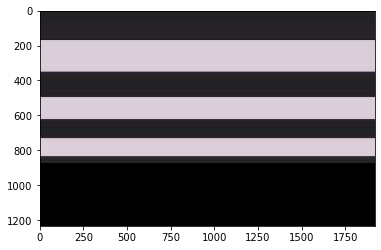

In [268]:
#Correcting Distortions:
import matplotlib.pyplot as plt
image = cv2.imread('Images\Fig1.png')
plt.imshow(image)
plt.show()
initial_points = np.array([[1595,37],[504,196],[1169,141],[1758,262],[655,336],[1290,344],[796,475],[1428,563],[366,767],[924,599]])
final_points = np.array([[1567,778],[71,1590],[659,1343],[1039,1222],[1550,1486],[220,1365],[792,1118],[1413,1228],[198,1002],[797,799],[1154,810],[1715,1008]])

b=[]
A=[]
for i in range(10):
    c=[]
    b.append((initial_points[i][0]/final_points[i][0])-1)
    b.append((initial_points[i][1]/final_points[i][1])-1)
    r1 = np.sqrt(initial_points[i][0]**2 + initial_points[i][1]**2)
    c.append(r1)
    c.append(r1**2)
    A.append(c)
    A.append(c)
  
A= np.asarray(A)
b = np.asarray(b)
q,r = np.linalg.qr(A)
q = q.T
M = np.dot(q,b)
R = np.dot(q,A)
k1,k2 = np.linalg.solve(R,M)
undist = cv2.undistort(image,cameraMatrix,np.float32(np.array([k1,k2,0,0])))  
plt.imshow(undist)
plt.show()

#  2.) ZHANG Method

# 2 a.) Camera Calibration using Zhang

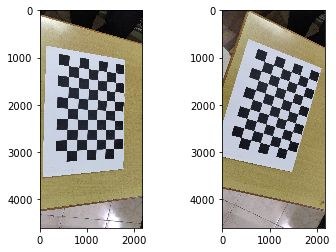

In [269]:
I1 = cv2.imread('./Images/Data/1.jpg')
I2 = cv2.imread('./Images/Data/2.jpg')
%matplotlib qt 
plt.subplot(121)
plt.imshow(I1[...,::-1])
plt.subplot(122)
plt.imshow(I2[...,::-1])
plt.show()

In [270]:
ret, corners = cv2.findChessboardCorners(I1,(6,9))
corners = corners.reshape(-1,2)
print (corners.shape)
print (corners[0])

(54, 2)
[ 617.5383 1189.7125]


True

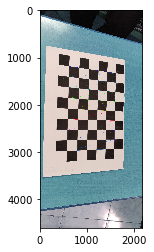

In [271]:
I_vis=I1.copy()
cv2.drawChessboardCorners(I_vis, (6,9), corners, ret) 
plt.imshow(I_vis)
plt.show()
cv2.imwrite('vis.jpg', I_vis)

In [272]:
x,y=np.meshgrid(range(6),range(9))
world_points=np.hstack((x.reshape(54,1),y.reshape(54,1),np.zeros((54,1)))).astype(np.float32)
## Correspondences
print (corners[0],'->',world_points[0])
print (corners[35],'->',world_points[35])

[ 617.5383 1189.7125] -> [0. 0. 0.]
[1582.2727 2337.397 ] -> [5. 5. 0.]


In [273]:
_3d_points=[]
_2d_points=[]

for i in range(2,7):
    im=cv2.imread('Data/' + str(i) + '.jpg')
    
    ret, corners = cv2.findChessboardCorners(im, (6,9))
    
    if ret: #add points only if checkerboard was correctly detected:
        _2d_points.append(corners) #append current 2D points
        _3d_points.append(world_points) #3D points are always the same


ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(_3d_points, _2d_points, (im.shape[1],im.shape[0]), None, None)

print('Reprojection Error:', ret)
print ('Camera Calibration Matrix:')
print(mtx)
print('Distortion Parameters:')
print(dist)
print('Rotation Vectors for the images are:')
print(rvecs)
print('Translation Vectors for the images are:')
print(tvecs)

Reprojection Error: 1.4189552755095118
Camera Calibration Matrix:
[[3.56109838e+03 0.00000000e+00 1.11270116e+03]
 [0.00000000e+00 3.51901482e+03 2.28253847e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Distortion Parameters:
[[ 1.97095733e-01 -2.36577049e+00 -1.37082343e-02  1.12773565e-03
   6.75635156e+00]]
Rotation Vectors for the images are:
[array([[-0.01168042],
       [-0.23375899],
       [ 0.29140115]]), array([[-0.32259069],
       [-0.17614009],
       [ 0.26771575]]), array([[-0.16573293],
       [-0.01627625],
       [ 0.23798135]]), array([[ 0.10652775],
       [ 0.09745762],
       [-0.21347686]]), array([[ 0.1807277 ],
       [-0.02561105],
       [-0.20383938]])]
Translation Vectors for the images are:
[array([[-1.01411213],
       [-5.65610506],
       [17.04360324]]), array([[-1.27176819],
       [-6.74232312],
       [19.27496105]]), array([[-1.66397155],
       [-7.96466328],
       [18.31140743]]), array([[-3.54351905],
       [-3.97541778],
       [17.21

# 2 b.) Wireframe 

In [274]:
import math
def eulerAnglesToRotationMatrix(theta) :
    R_x = np.array([[1,0,0],[0,math.cos(theta[0]),-math.sin(theta[0])],[0,math.sin(theta[0]), math.cos(theta[0])]])
    R_y = np.array([[math.cos(theta[1]),0,math.sin(theta[1])],[0,1,0],[-math.sin(theta[1]),0,math.cos(theta[1])]])             
    R_z = np.array([[math.cos(theta[2]),-math.sin(theta[2]),0],[math.sin(theta[2]),math.cos(theta[2]),0],[0,0,1]])
    R = np.dot(R_z,np.dot(R_y,R_x))
    return R

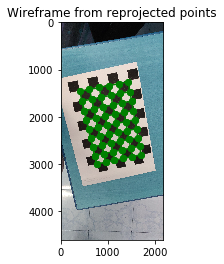

In [275]:
r =  rvecs[4]
R = (eulerAnglesToRotationMatrix(r))
world_points_1 = np.hstack((x.reshape(54,1),y.reshape(54,1),np.zeros((54,1)),np.ones((54,1)))).astype(np.float32)

temp1 = np.zeros((3,4))
temp1[0:3,0:3] = R[0:3,0:3]
temp1[:,3] = tvecs[4][:,0]
P = np.matmul(mtx,temp1)
P = P/P[2,3]

projected_points = []
for i in range(54):
    projection = np.matmul(P,np.transpose(world_points_1[i,:]))
    projection = projection/projection[2]
    projected_points.append(projection[0:2])
projected_points = np.asarray(projected_points)

### Wireframe
idx = [5,11,17,23,29,35,41,47,53]
idx1 = [8,17,26,35,44,53]
q = 0
p = 0
for i in range(projected_points.shape[0]):
    if (i == idx[q]):
        q = q + 1
        continue
    plt.plot([projected_points[i][0],projected_points[i+1][0]],[projected_points[i][1],projected_points[i+1][1]],'go-')
for i in range(9):
    i1 = i
    j =  i + 6
    while(j < 54):
        plt.plot([projected_points[i1][0],projected_points[j][0]],[projected_points[i1][1],projected_points[j][1]],'go-')
        i1 = j
        j = j + 6
plt.imshow(im)
plt.title('Wireframe from reprojected points')
plt.show() 


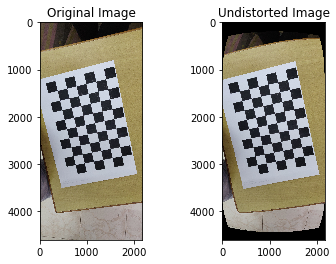

In [276]:
I = cv2.imread('Images/Data/5.jpg')[...,::-1]
I_undistort = cv2.undistort(I,mtx,dist)
plt.subplot(1,2,1)
plt.imshow(I)
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(I_undistort)
plt.title('Undistorted Image')
plt.show()

# Hands On

# Camera Calibration

In [277]:
I1 = cv2.imread('./Images/Data3/1.jpg')
I2 = cv2.imread('./Images/Data3/4.jpg')
%matplotlib qt 
plt.subplot(121)
plt.imshow(I1[...,::-1])
plt.subplot(122)
plt.imshow(I2[...,::-1])
plt.show()

In [278]:
ret, corners = cv2.findChessboardCorners(I1,(6,9))
corners = corners.reshape(-1,2)
print (corners.shape)
print (corners[0])

(54, 2)
[225.48366 600.6989 ]


In [279]:
I_vis=I1.copy()
cv2.drawChessboardCorners(I_vis, (6,9), corners, ret) 
plt.imshow(I_vis)
plt.show()
cv2.imwrite('vis.jpg', I_vis)

True

In [280]:
x,y=np.meshgrid(range(6),range(9))
world_points=np.hstack((x.reshape(54,1),y.reshape(54,1),np.zeros((54,1)))).astype(np.float32)
## Correspondences
print (corners[0],'->',world_points[0])
print (corners[35],'->',world_points[35])

[225.48366 600.6989 ] -> [0. 0. 0.]
[608.50446 178.17035] -> [5. 5. 0.]


Reprojection Error: 0.7516003100403356
Camera Calibration Matrix:
[[839.48984091   0.         522.92793395]
 [  0.         838.07146241 382.08391345]
 [  0.           0.           1.        ]]
Distortion Parameters:
[[ 2.67000882e-01 -9.91593558e-01 -3.05530521e-03 -1.12113452e-03
   1.29126660e+00]]
Rotation Vectors for the images are:
[array([[ 0.33635199],
       [-0.3021345 ],
       [-1.57609717]]), array([[ 0.28640832],
       [ 0.22626251],
       [-1.58270857]]), array([[-0.45939381],
       [-0.56836444],
       [-1.52309109]]), array([[-0.3663472 ],
       [ 0.19773946],
       [-2.12864633]]), array([[-0.00427725],
       [-0.07244462],
       [-1.36006981]]), array([[ 0.22733869],
       [-0.4020304 ],
       [-1.50759971]]), array([[-0.32502175],
       [ 0.35470122],
       [-1.5779878 ]]), array([[ 0.00264352],
       [-0.01127682],
       [-1.58146962]])]
Translation Vectors for the images are:
[array([[-3.32454522],
       [ 2.42393752],
       [ 9.55807641]]), array([

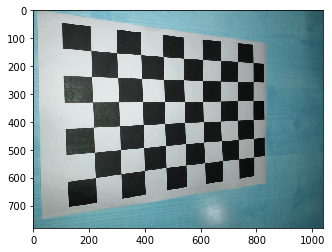

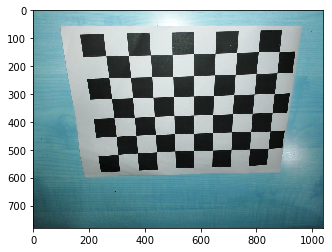

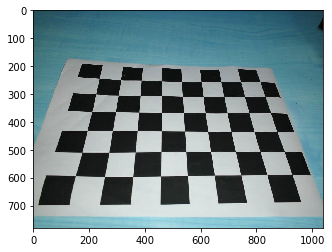

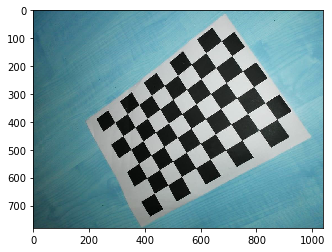

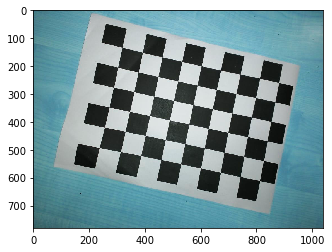

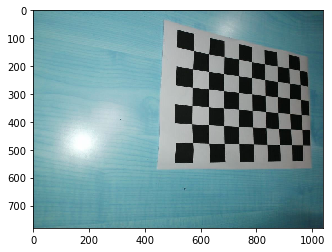

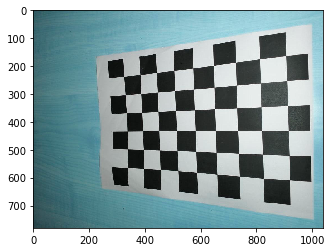

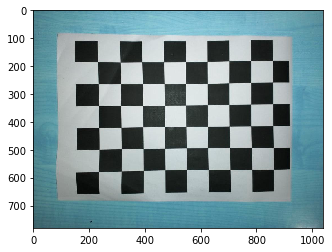

In [281]:
_3d_points=[]
_2d_points=[]
imi = []
for i in range(1,9):
    im=cv2.imread('Images/Data3/' + str(i) + '.jpg')
    plt.imshow(im)
    imi.append(im)
    ret, corners = cv2.findChessboardCorners(im, (6,9))
    
    if ret: #add points only if checkerboard was correctly detected:
        _2d_points.append(corners) #append current 2D points
        _3d_points.append(world_points) #3D points are always the same


ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(_3d_points, _2d_points, (im.shape[1],im.shape[0]), None, None)

print('Reprojection Error:', ret)
print ('Camera Calibration Matrix:')
print(mtx)
print('Distortion Parameters:')
print(dist)
print('Rotation Vectors for the images are:')
print(rvecs)
print('Translation Vectors for the images are:')
print(tvecs)
%matplotlib inline
for i in imi:
    plt.imshow(i)
    plt.show()

In [282]:
import math
def eulerAnglesToRotationMatrix(theta) :
    R_x = np.array([[1,0,0],[0,math.cos(theta[0]),-math.sin(theta[0])],[0,math.sin(theta[0]), math.cos(theta[0])]])
    R_y = np.array([[math.cos(theta[1]),0,math.sin(theta[1])],[0,1,0],[-math.sin(theta[1]),0,math.cos(theta[1])]])             
    R_z = np.array([[math.cos(theta[2]),-math.sin(theta[2]),0],[math.sin(theta[2]),math.cos(theta[2]),0],[0,0,1]])
    R = np.dot(R_z,np.dot(R_y,R_x))
    return R

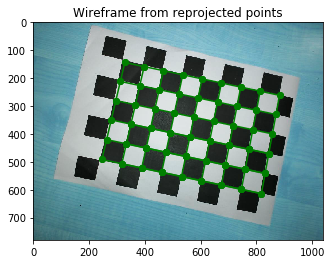

In [283]:
r =  rvecs[4]
R = (eulerAnglesToRotationMatrix(r))
world_points_1 = np.hstack((x.reshape(54,1),y.reshape(54,1),np.zeros((54,1)),np.ones((54,1)))).astype(np.float32)

temp1 = np.zeros((3,4))
temp1[0:3,0:3] = R[0:3,0:3]
temp1[:,3] = tvecs[4][:,0]
P = np.matmul(mtx,temp1)
P = P/P[2,3]

projected_points = []
for i in range(54):
    projection = np.matmul(P,np.transpose(world_points_1[i,:]))
    projection = projection/projection[2]
    projected_points.append(projection[0:2])
projected_points = np.asarray(projected_points)

### Wireframe
idx = [5,11,17,23,29,35,41,47,53]
idx1 = [8,17,26,35,44,53]
q = 0
p = 0
for i in range(projected_points.shape[0]):
    if (i == idx[q]):
        q = q + 1
        continue
    plt.plot([projected_points[i][0],projected_points[i+1][0]],[projected_points[i][1],projected_points[i+1][1]],'go-')
for i in range(9):
    i1 = i
    j =  i + 6
    while(j < 54):
        plt.plot([projected_points[i1][0],projected_points[j][0]],[projected_points[i1][1],projected_points[j][1]],'go-')
        i1 = j
        j = j + 6
plt.imshow(imi[4])
plt.title('Wireframe from reprojected points')
plt.show() 


In [11]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('Images/cpu.jpg')
cv2.imshow('image',image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
M = [[0,0,0],[6.3,0,0],[6.3,0,11.5],[0,0,11.5],[0,15,0],[0,15,11.5],[6.3,15,0]]
P = [[269,408],[461,351],[209,322],[33,354],[330,927],[123,754],[476,807]]


In [18]:
def Normalization(nd,x):
    '''
    Normalization of coordinates (centroid to the origin and mean distance of sqrt(2 or 3).
    Inputs:
     nd: number of dimensions (2 for 2D; 3 for 3D)
     x: the data to be normalized (directions at different columns and points at rows)
    Outputs:
     Tr: the transformation matrix (translation plus scaling)
     x: the transformed data
    '''

    x = np.asarray(x)
    m, s = np.mean(x,0), np.std(x)
    if nd==2:
        Tr = np.array([[s, 0, m[0]], [0, s, m[1]], [0, 0, 1]])
    else:
        Tr = np.array([[s, 0, 0, m[0]], [0, s, 0, m[1]], [0, 0, s, m[2]], [0, 0, 0, 1]])
        
    Tr = np.linalg.inv(Tr)
    x = np.dot( Tr, np.concatenate( (x.T, np.ones((1,x.shape[0]))) ) )
    x = x[0:nd,:].T

    return Tr, x

In [20]:
import numpy as np
M = np.asarray(M)
P = np.asarray(P)
M_trace, M_norm = Normalization(3, M)
P_trace, P_norm = Normalization(2, P)
A = []
n = M.shape[0]
for i in range(n):
    x, y, z = M[i, 0], M[i, 1], M[i, 2]
    u, v = P[i, 0], P[i, 1]
    A.append( [x, y, z, 1, 0, 0, 0, 0, -u * x, -u * y, -u * z, -u] )
    A.append( [0, 0, 0, 0, x, y, z, 1, -v * x, -v * y, -v * z, -v] )

# Convert A to array
A = np.asarray(A) 
# Find the 11 parameters:
U, S, V = np.linalg.svd(A)

# The parameters are in the last line of Vh and normalize them
L = V[-1, :] / V[-1, -1]
print(L)
# Camera projection matrix
H = L.reshape(3, 3 + 1)
print(H)

# Denormalization
# pinv: Moore-Penrose pseudo-inverse of a matrix, generalized inverse of a matrix using its SVD
H = np.dot( np.dot( np.linalg.pinv(P_trace), H ), M_trace)
print(H)
H = H / H[-1, -1]
print(H)


[ 4.75151207e+01  1.11400244e+01 -1.90754602e+01  2.67706801e+02
  4.05052138e+00  5.41771970e+01  8.97036150e+00  4.06855012e+02
  3.61661540e-02  2.10269002e-02  3.81293898e-02  1.00000000e+00]
[[ 4.75151207e+01  1.11400244e+01 -1.90754602e+01  2.67706801e+02]
 [ 4.05052138e+00  5.41771970e+01  8.97036150e+00  4.06855012e+02]
 [ 3.61661540e-02  2.10269002e-02  3.81293898e-02  1.00000000e+00]]
[[ 1.99386946e+03  4.68045131e+02 -7.98035037e+02  6.19788124e+04]
 [ 1.73267673e+02  2.27352840e+03  3.79732272e+02  8.41637594e+04]
 [ 6.13516430e-03  3.56696727e-03  6.46820426e-03  9.28625546e-01]]
[[ 2.14711890e+03  5.04019229e+02 -8.59372263e+02  6.67425236e+04]
 [ 1.86585082e+02  2.44827251e+03  4.08918615e+02  9.06326126e+04]
 [ 6.60671498e-03  3.84112551e-03  6.96535249e-03  1.00000000e+00]]


In [21]:
#Rotation Matrix
proj = np.asarray(H)
cameraMatrix, rotMatrix, transVect, rotMatrixX, rotMatrixY, rotMatrixZ, eulerAngles = cv2.decomposeProjectionMatrix(proj)
print(rotMatrix)

[[ 0.7062073   0.06394931 -0.70511115]
 [-0.30500955  0.92623753 -0.22147959]
 [ 0.63893694  0.37147614  0.67362086]]


In [22]:
#camera centre
Q=H[0:3,0:3]
Qinv=np.linalg.inv(Q)
cam_centre=np.matmul(-Qinv,H[:,3])
print(cam_centre)

[-57.71437873 -19.58897096 -78.02244812]
